<a href="https://colab.research.google.com/github/jrchac/ML-Recruitment-Project/blob/main/Model_1_SVM_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 1 (SVM RBF)

Support Vector Machine with Radial Basis Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.ticker import FormatStrFormatter


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import csv
data = pd.read_csv('recruitmentdataset-2022-1.3.csv')

In [4]:
data = data[data['company']=='C']
data.shape

(1000, 15)

In [5]:
# normalize grades to between 0-1
grades = data['ind-university_grade']
data['ind-university_grade']= (grades-grades.min())/(grades.max()-grades.min())
data['ind-university_grade']

2000    0.344828
2001    0.448276
2002    0.448276
2003    0.275862
2004    0.827586
          ...   
2995    0.965517
2996    0.586207
2997    0.379310
2998    0.758621
2999    0.034483
Name: ind-university_grade, Length: 1000, dtype: float64

In [6]:
# function to one-hot encode categorical data that are currently strings
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [7]:
# perform one-hot encoding for these columns
features_to_encode = ['ind-degree', 'gender', 'sport', 'nationality']
for feature in features_to_encode:
    data = encode_and_bind(data, feature)

In [8]:
# column names of expanded dataframe
data.columns

Index(['Id', 'age', 'ind-university_grade', 'ind-debateclub',
       'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp',
       'ind-languages', 'ind-exact_study', 'company', 'decision',
       'ind-degree_bachelor', 'ind-degree_master', 'ind-degree_phd',
       'gender_female', 'gender_male', 'gender_other', 'sport_Chess',
       'sport_Cricket', 'sport_Football', 'sport_Golf', 'sport_Rugby',
       'sport_Running', 'sport_Swimming', 'sport_Tennis',
       'nationality_Belgian', 'nationality_Dutch', 'nationality_German'],
      dtype='object')

In [9]:
# M1 models
y = data['decision']

# use most important from logistic ranking
x_4_1 = data[['ind-international_exp', 'ind-languages', 'ind-degree_bachelor','ind-degree_phd']]
# use most important from rf ranking
x_4_2 = data[['ind-international_exp', 'ind-languages', 'ind-university_grade','age']]
# combining correlation matrix
x_4_3 = data[['age', 'ind-international_exp', 'ind-languages', 'ind-degree_bachelor']]


# use most important from logistic ranking
x_3_1 = data[['ind-international_exp', 'ind-degree_bachelor','ind-degree_phd']]
# use most important from rf ranking
x_3_2 = data[['ind-international_exp', 'ind-languages', 'ind-university_grade']]


# use most important from logistic ranking
x_5_1 = data[['ind-international_exp', 'ind-languages', 'ind-degree_bachelor','ind-degree_phd', 'ind-exact_study']]
# use most important from rf ranking
x_5_2 = data[['ind-international_exp', 'ind-languages', 'ind-university_grade','age', 'ind-degree_bachelor']]

In [10]:
x_train_41, x_test_41, y_train_41, y_test_41 = train_test_split(x_4_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)

x_train_42, x_test_42, y_train_42, y_test_42 = train_test_split(x_4_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)

x_train_43, x_test_43, y_train_43, y_test_43 = train_test_split(x_4_3, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)


x_train_31, x_test_31, y_train_31, y_test_31 = train_test_split(x_3_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)

x_train_32, x_test_32, y_train_32, y_test_32 = train_test_split(x_3_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)



x_train_51, x_test_51, y_train_51, y_test_51 = train_test_split(x_5_1, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)

x_train_52, x_test_52, y_train_52, y_test_52 = train_test_split(x_5_2, y, test_size = 0.2, train_size = 0.8 ,random_state = 1)



In [11]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# Set the parameters by cross-validation
hyper_params = [ {'C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= ['accuracy', 'precision','recall','f1'],
                        cv = folds,
                        refit = 'f1',
                        verbose = 0,
                        return_train_score=True)

# Model 4-1

## train and validation

In [12]:
m_41 = model_cv.fit(x_train_41, y_train_41)
hp_41 = m_41.best_params_

In [13]:
cvresults_41 = pd.DataFrame(m_41.cv_results_)
# cvresults_41.to_excel("output41.xlsx")

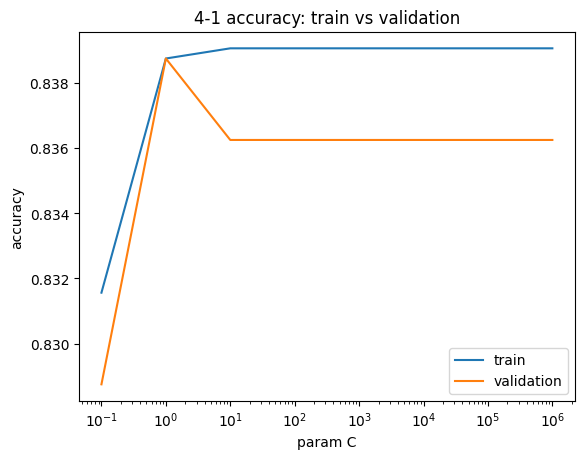

In [14]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_41['param_C'], cvresults_41['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_41['param_C'], cvresults_41['mean_test_accuracy'], label = "validation")

plt.title("4-1 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

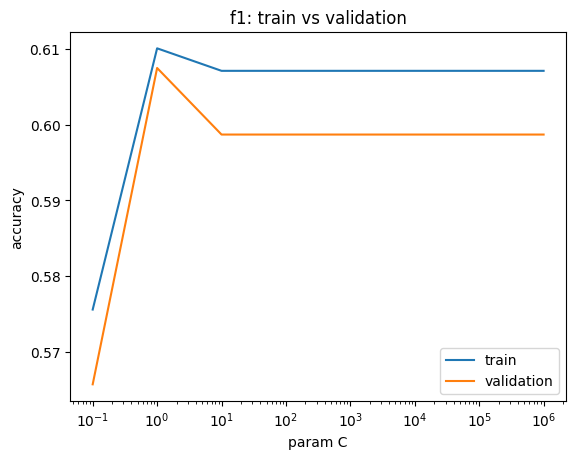

In [15]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_41['param_C'], cvresults_41['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_41['param_C'], cvresults_41['mean_test_f1'], label = "validation")

plt.title("f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

## test

In [16]:
# test performance
pre_41 = m_41.predict(x_test_41)
t_ac_41 = metrics.accuracy_score(y_test_41, pre_41)
t_prec_41 = metrics.precision_score(y_test_41, pre_41)
t_recal_41 = metrics.recall_score(y_test_41, pre_41)
t_f1_41 = metrics.f1_score(y_test_41, pre_41)
print(t_ac_41)
print(t_prec_41)
print(t_recal_41)
print(t_f1_41)
print(metrics.confusion_matrix(y_test_41, pre_41))

0.845
0.8
0.5384615384615384
0.6436781609195402
[[141   7]
 [ 24  28]]


# Model 4-2

In [17]:
m_42 = model_cv.fit(x_train_42, y_train_42)
hp_42 = m_42.best_params_

In [18]:
cvresults_42 = pd.DataFrame(m_41.cv_results_)
# cvresults_42.to_excel("output42.xlsx")

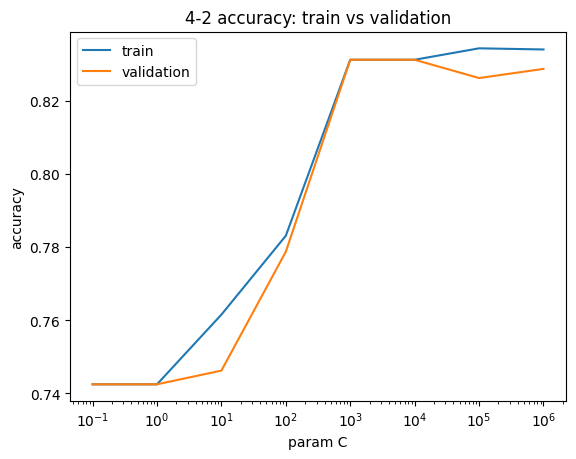

In [19]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_42['param_C'], cvresults_42['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_42['param_C'], cvresults_42['mean_test_accuracy'], label = "validation")

plt.title("4-2 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

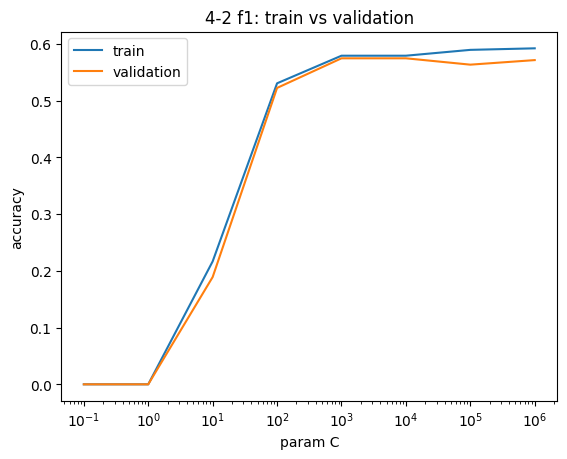

In [20]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_42['param_C'], cvresults_42['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_42['param_C'], cvresults_42['mean_test_f1'], label = "validation")

plt.title("4-2 f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

In [21]:
pre_42 = m_42.predict(x_test_42)
t_ac_42 = metrics.accuracy_score(y_test_42, pre_42)
t_prec_42 = metrics.precision_score(y_test_42, pre_42)
t_recal_42 = metrics.recall_score(y_test_42, pre_42)
t_f1_42 = metrics.f1_score(y_test_42, pre_42)
print(t_ac_42)
print(t_prec_42)
print(t_recal_42)
print(t_f1_42)
print(metrics.confusion_matrix(y_test_42, pre_42))

0.845
0.8181818181818182
0.5192307692307693
0.6352941176470589
[[142   6]
 [ 25  27]]


# Model 4-3

In [22]:
m_43 = model_cv.fit(x_train_43, y_train_43)
hp_43 = m_43.best_params_

In [23]:
cvresults_43 = pd.DataFrame(m_43.cv_results_)
# cvresults_43.to_excel("output43.xlsx")

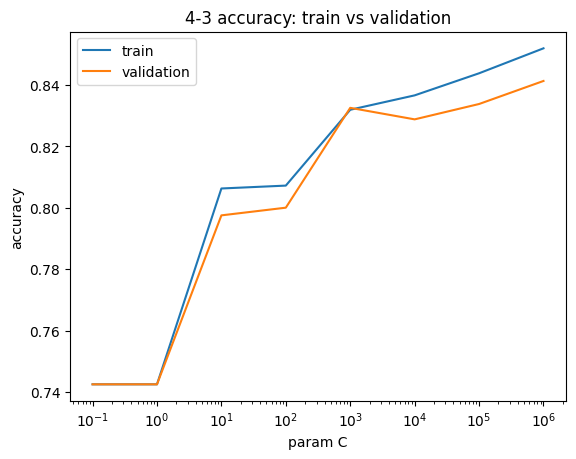

In [24]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_43['param_C'], cvresults_43['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_43['param_C'], cvresults_43['mean_test_accuracy'], label = "validation")

plt.title("4-3 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

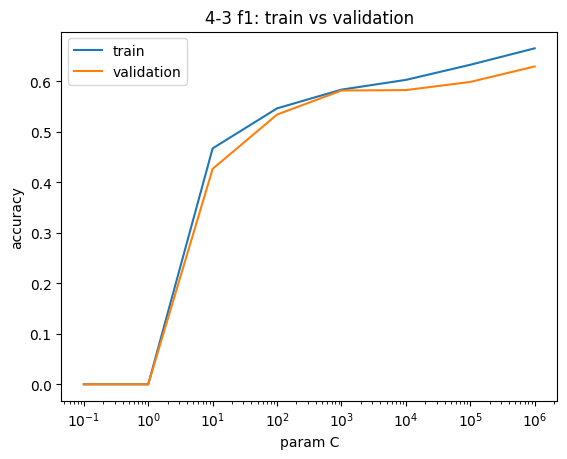

In [25]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_43['param_C'], cvresults_43['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_43['param_C'], cvresults_43['mean_test_f1'], label = "validation")

plt.title("4-3 f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

In [26]:
pre_43 = m_43.predict(x_test_43)
t_ac_43 = metrics.accuracy_score(y_test_43, pre_43)
t_prec_43 = metrics.precision_score(y_test_43, pre_43)
t_recal_43 = metrics.recall_score(y_test_43, pre_43)
t_f1_43 = metrics.f1_score(y_test_43, pre_43)
print(t_ac_43)
print(t_prec_43)
print(t_recal_43)
print(t_f1_43)
print(metrics.confusion_matrix(y_test_43, pre_43))

0.865
0.8205128205128205
0.6153846153846154
0.7032967032967034
[[141   7]
 [ 20  32]]


# Model 3-1

In [27]:
# fit 3 feature model
m_31 = model_cv.fit(x_train_31, y_train_31)
hp_31 = m_31.best_params_

In [28]:
cvresults_31 = pd.DataFrame(m_31.cv_results_)
# cvresults_31.to_excel("output31.xlsx")

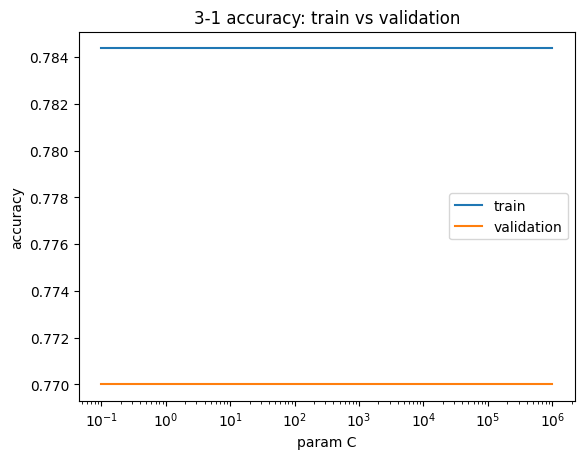

In [29]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_31['param_C'], cvresults_31['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_31['param_C'], cvresults_31['mean_test_accuracy'], label = "validation")

plt.title("3-1 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

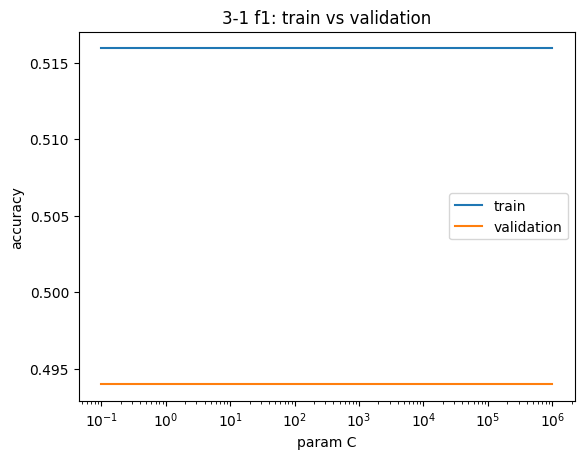

In [30]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_31['param_C'], cvresults_31['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_31['param_C'], cvresults_31['mean_test_f1'], label = "validation")

plt.title("3-1 f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

In [31]:
pre_31 = m_31.predict(x_test_31)
t_ac_31 = metrics.accuracy_score(y_test_31, pre_31)
t_prec_31 = metrics.precision_score(y_test_31, pre_31)
t_recal_31 = metrics.recall_score(y_test_31, pre_31)
t_f1_31 = metrics.f1_score(y_test_31, pre_31)
print(t_ac_31)
print(t_prec_31)
print(t_recal_31)
print(t_f1_31)
print(metrics.confusion_matrix(y_test_31, pre_31))

0.795
0.6341463414634146
0.5
0.5591397849462365
[[133  15]
 [ 26  26]]


# Model 3-2

In [32]:
m_32 = model_cv.fit(x_train_32, y_train_32)
hp_32 = m_32.best_params_

In [33]:
cvresults_32 = pd.DataFrame(m_32.cv_results_)
cvresults_32.to_excel("output32.xlsx")

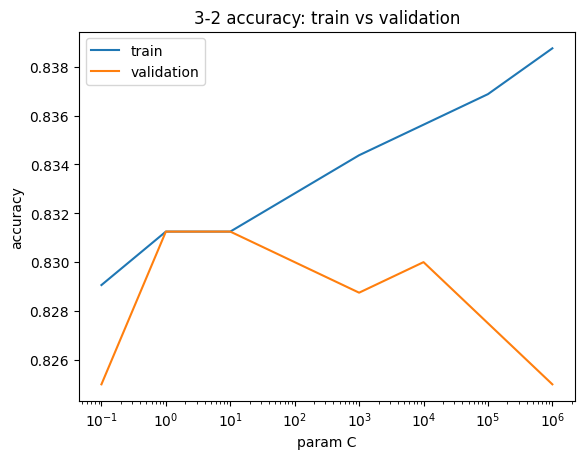

In [34]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_32['param_C'], cvresults_32['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_32['param_C'], cvresults_32['mean_test_accuracy'], label = "validation")

plt.title("3-2 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

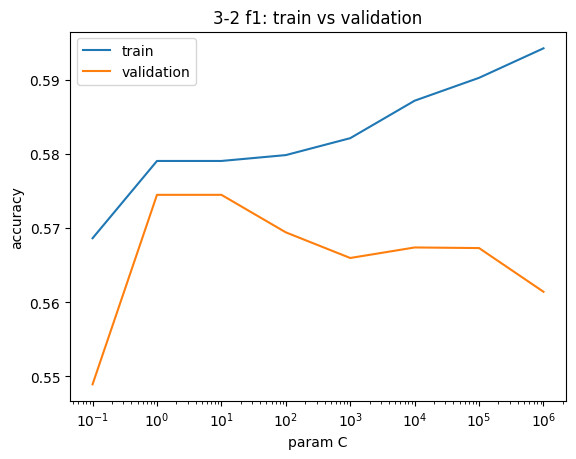

In [35]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_32['param_C'], cvresults_32['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_32['param_C'], cvresults_32['mean_test_f1'], label = "validation")

plt.title("3-2 f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

In [36]:
pre_32 = m_32.predict(x_test_32)
t_ac_32 = metrics.accuracy_score(y_test_32, pre_32)
t_prec_32 = metrics.precision_score(y_test_32, pre_32)
t_recal_32 = metrics.recall_score(y_test_32, pre_32)
t_f1_32 = metrics.f1_score(y_test_32, pre_32)
print(t_ac_32)
print(t_prec_32)
print(t_recal_32)
print(t_f1_32)
print(metrics.confusion_matrix(y_test_32, pre_32))

0.845
0.8181818181818182
0.5192307692307693
0.6352941176470589
[[142   6]
 [ 25  27]]


# Model 5-1

In [37]:
# fit 5 feature model
m_51 = model_cv.fit(x_train_51, y_train_51)
hp_51 = m_51.best_params_

In [38]:
cvresults_51 = pd.DataFrame(m_51.cv_results_)
# cvresults_51.to_excel("output51.xlsx")

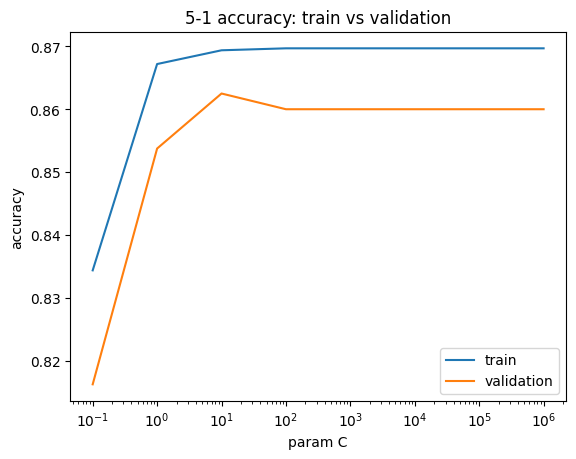

In [39]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_51['param_C'], cvresults_51['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_51['param_C'], cvresults_51['mean_test_accuracy'], label = "validation")

plt.title("5-1 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

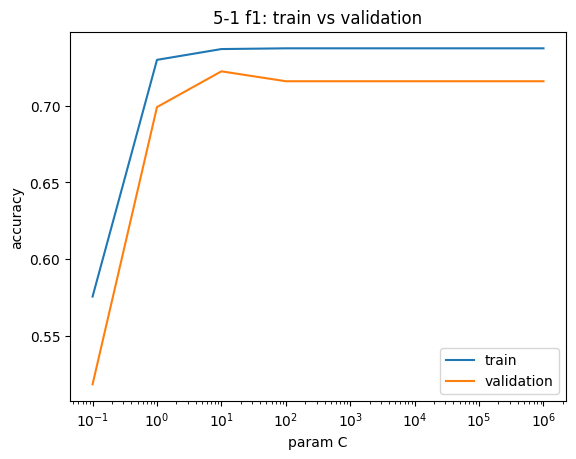

In [40]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_51['param_C'], cvresults_51['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_51['param_C'], cvresults_51['mean_test_f1'], label = "validation")

plt.title("5-1 f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

In [41]:
pre_51 = m_51.predict(x_test_51)
t_ac_51 = metrics.accuracy_score(y_test_51, pre_51)
t_prec_51 = metrics.precision_score(y_test_51, pre_51)
t_recal_51 = metrics.recall_score(y_test_51, pre_51)
t_f1_51 = metrics.f1_score(y_test_51, pre_51)
print(t_ac_51)
print(t_prec_51)
print(t_recal_51)
print(t_f1_51)
print(metrics.confusion_matrix(y_test_51, pre_51))

0.865
0.7551020408163265
0.7115384615384616
0.7326732673267328
[[136  12]
 [ 15  37]]


# Model 5-2

In [42]:
m_52 = model_cv.fit(x_train_52, y_train_52)
hp_52 = m_52.best_params_

In [43]:
cvresults_52 = pd.DataFrame(m_52.cv_results_)
# cvresults_52.to_excel("output52.xlsx")

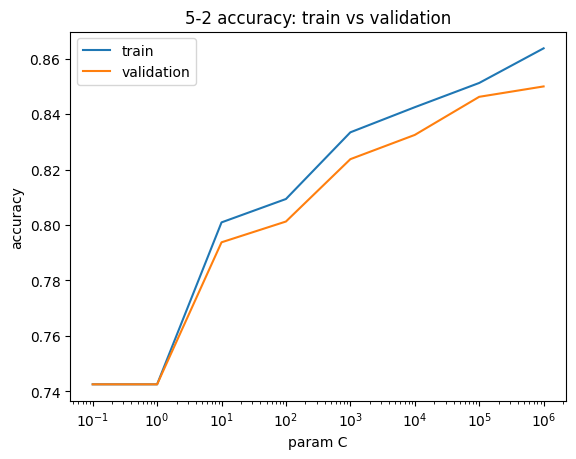

In [44]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_52['param_C'], cvresults_52['mean_train_accuracy'], label = "train")
line2 = ax.plot(cvresults_52['param_C'], cvresults_52['mean_test_accuracy'], label = "validation")

plt.title("5-2 accuracy: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

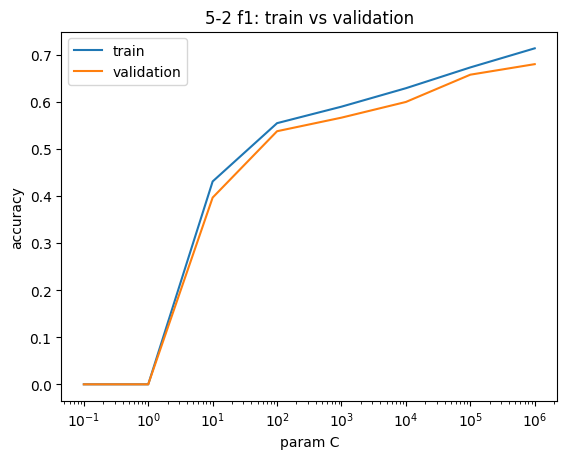

In [45]:
fig, ax = plt.subplots()

line1 = ax.plot(cvresults_52['param_C'], cvresults_52['mean_train_f1'], label = "train")
line2 = ax.plot(cvresults_52['param_C'], cvresults_52['mean_test_f1'], label = "validation")

plt.title("5-2 f1: train vs validation")
plt.xlabel("param C")
plt.ylabel("accuracy")

plt.xscale('log')
plt.legend()
plt.show()

In [46]:
pre_52 = m_52.predict(x_test_52)
t_ac_52 = metrics.accuracy_score(y_test_52, pre_52)
t_prec_52 = metrics.precision_score(y_test_52, pre_52)
t_recal_52 = metrics.recall_score(y_test_52, pre_52)
t_f1_52 = metrics.f1_score(y_test_52, pre_52)
print(t_ac_52)
print(t_prec_52)
print(t_recal_52)
print(t_f1_52)
print(metrics.confusion_matrix(y_test_52, pre_52))

0.885
0.8372093023255814
0.6923076923076923
0.7578947368421053
[[141   7]
 [ 16  36]]


# Comparing all models

In [47]:
numbering = ['svm1_4-1','svm1_4-2','svm1_4-3','svm1_3-1','svm1_3-2','svm1_5-1','svm1_5-2']

performance = pd.DataFrame(data=numbering, columns = ["model_number"])

performance["accuracy"] = [t_ac_41,t_ac_42,t_ac_43,t_ac_31, t_ac_32, t_ac_51,t_ac_52]

performance["precision"] = [t_prec_41,t_prec_42,t_prec_43,t_prec_31, t_prec_32, t_prec_51,t_prec_52]

performance["recall"] = [t_recal_41,t_recal_42,t_recal_43,t_recal_31, t_recal_32, t_recal_51,t_recal_52]

performance["f1"] = [t_f1_41,t_f1_42,t_f1_43,t_f1_31, t_f1_32, t_f1_51,t_f1_52]

performance["best_hyper_params"] = [hp_41,hp_42,hp_43,hp_31, hp_32, hp_51,hp_52]

performance

,model_number,accuracy,precision,recall,f1,best_hyper_params
0,svm1_4-1,0.845,0.800000,0.538462,0.643678,{'C': 1}
1,svm1_4-2,0.845,0.818182,0.519231,0.635294,{'C': 1000}
2,svm1_4-3,0.865,0.820513,0.615385,0.703297,{'C': 1000000}
3,svm1_3-1,0.795,0.634146,0.500000,0.559140,{'C': 0.1}
4,svm1_3-2,0.845,0.818182,0.519231,0.635294,{'C': 1}
5,svm1_5-1,0.865,0.755102,0.711538,0.732673,{'C': 10}
6,svm1_5-2,0.885,0.837209,0.692308,0.757895,{'C': 1000000}
